In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [22]:

# Load data
df = pd.read_csv("customer_reviews_unique.csv")
X = df["review_text"]
y = df["is_spam"]


In [23]:

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=500)
X_vec = vectorizer.fit_transform(X).toarray()
feature_names = vectorizer.get_feature_names_out()

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)


In [24]:

# Model pipeline
model = make_pipeline(StandardScaler(), SVC(kernel='linear'))
model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [33]:

# Predict
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
clasify = classification_report(y_test,y_pred)
print("Accuracy:", accuracy)
print("Classification Report:", clasify)

Accuracy: 1.0
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       1.00      1.00      1.00        20

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



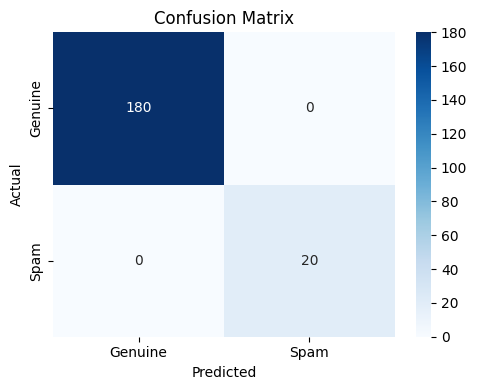

In [26]:

# --- 1. Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine', 'Spam'], yticklabels=['Genuine', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


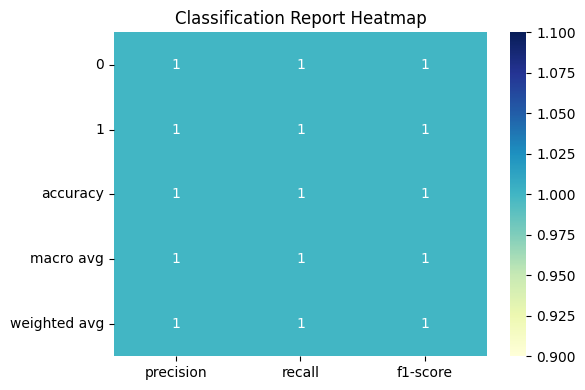

In [27]:

# --- 2. Classification Report Heatmap ---
report = classification_report(y_test, y_pred, output_dict=True)
plt.figure(figsize=(6, 4))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='YlGnBu')
plt.title('Classification Report Heatmap')
plt.tight_layout()
plt.show()


/tmp/ipython-input-28-1389911195.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weights, y=top_features, palette='coolwarm')


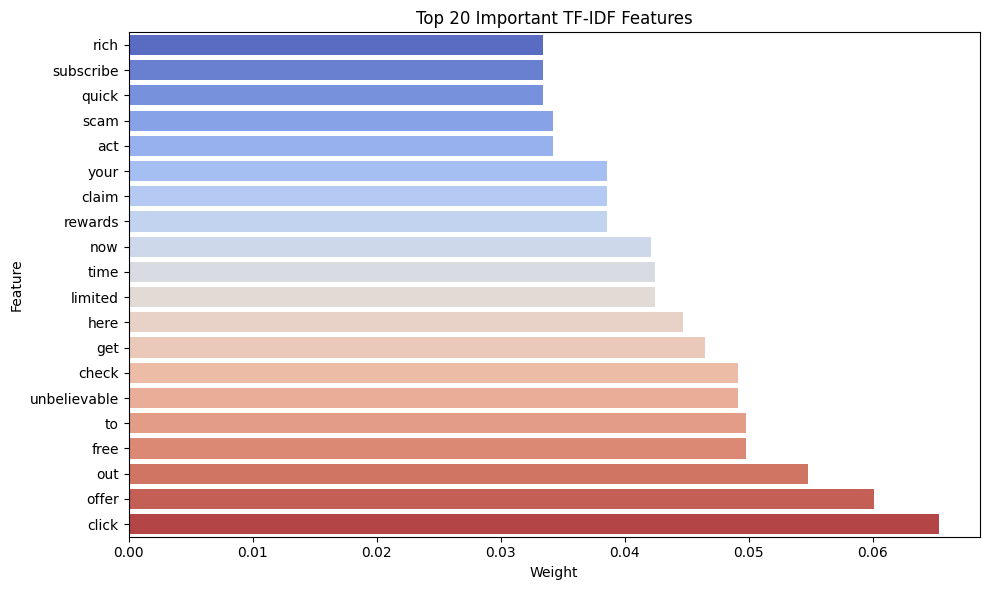

In [28]:

# --- 3. Top 20 Important TF-IDF Features ---
svm = model.named_steps['svc']
coefficients = svm.coef_.flatten()
top_indices = np.argsort(np.abs(coefficients))[-20:]
top_features = [feature_names[i] for i in top_indices]
top_weights = coefficients[top_indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_weights, y=top_features, palette='coolwarm')
plt.title('Top 20 Important TF-IDF Features')
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


/tmp/ipython-input-29-2289699992.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["SVM Accuracy"], y=[accuracy], palette="viridis")


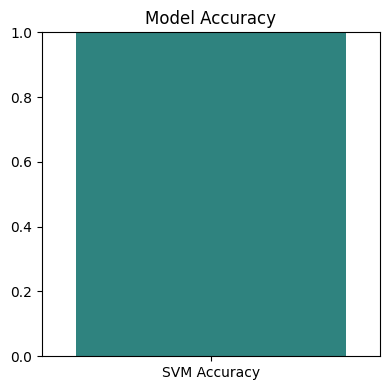

In [29]:

# --- 4. Accuracy Bar Plot ---
plt.figure(figsize=(4, 4))
sns.barplot(x=["SVM Accuracy"], y=[accuracy], palette="viridis")
plt.title("Model Accuracy")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


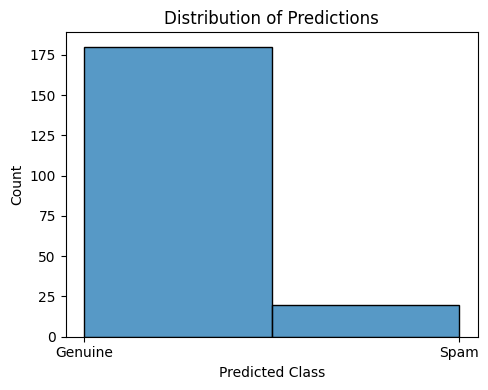

In [30]:

# --- 5. Prediction Distribution ---
plt.figure(figsize=(5, 4))
sns.histplot(y_pred, kde=False, bins=2)
plt.xticks([0, 1], ["Genuine", "Spam"])
plt.title("Distribution of Predictions")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


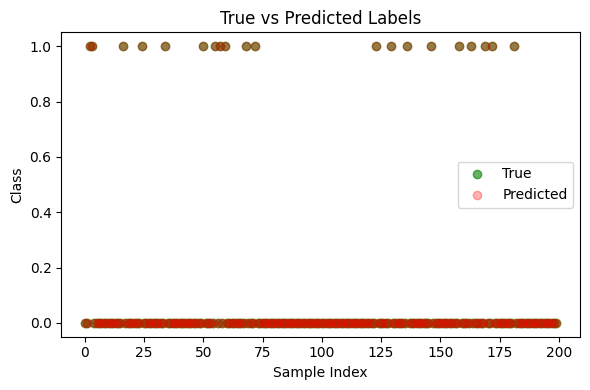

In [31]:

# --- 6. True vs Predicted Scatter Plot ---
plt.figure(figsize=(6, 4))
plt.scatter(range(len(y_test)), y_test, color='green', alpha=0.6, label="True")
plt.scatter(range(len(y_pred)), y_pred, color='red', alpha=0.3, label="Predicted")
plt.title("True vs Predicted Labels")
plt.xlabel("Sample Index")
plt.ylabel("Class")
plt.legend()
plt.tight_layout()
plt.show()